André Bamberg Pan, RA:2079844

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import multivariate_normal

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
def univariate_normal(x, mean, std):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * std**2)) * np.exp(-(x - mean)**2 / (2 * std**2)))

Função para estimar e plotar a gaussiana 1D

In [6]:
feature_names = iris.feature_names

def plot_gaussian_1d(X, subset_name, feature_names):
    plt.figure(figsize=(12, 6))
    for i in range(X.shape[1]):
        feature = X[:, i]
        mean = np.mean(feature)
        std_dev = np.std(feature)

        x_values = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 150)
        y_values = univariate_normal(x_values, mean, std_dev)

        #plota a gaussiana para as características
        plt.plot(x_values, y_values, label=f'{feature_names[i]} (média={mean:.2f}, desvio padrão={std_dev:.2f})')

    plt.title(f'Gaussiana 1D - {subset_name}')
    plt.xlabel('X')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()


Gaussiana 1D dos dados de treino

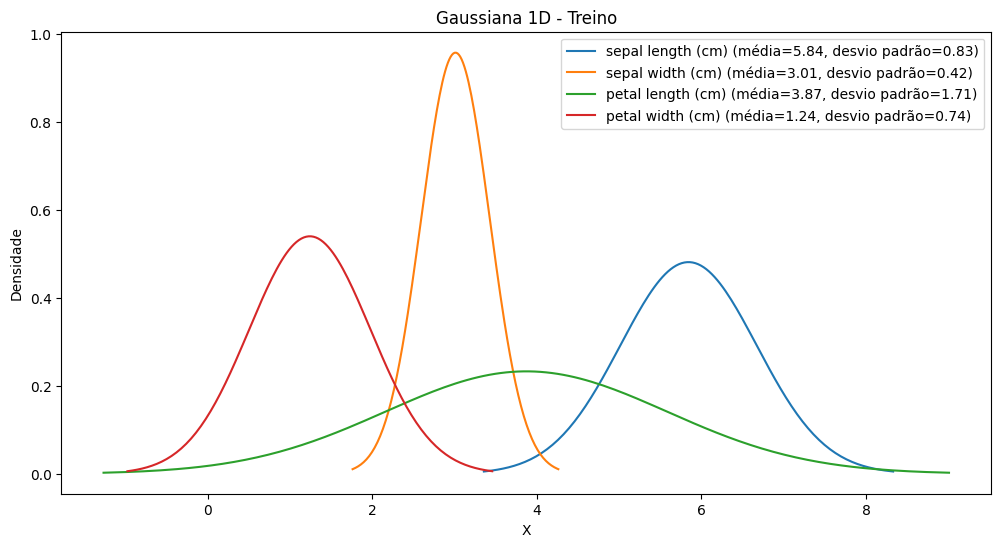

In [7]:
plot_gaussian_1d(X_train, 'Treino', feature_names)

Gaussiana 1D para os dados de teste

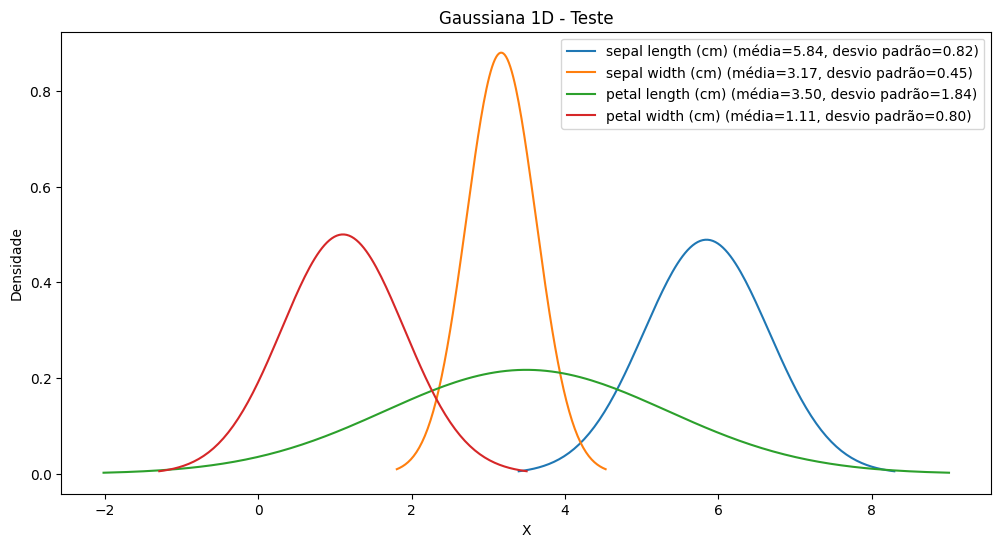

In [8]:
plot_gaussian_1d(X_test, 'Teste', feature_names)

Função para fazer o scatterplot dos dados

In [9]:
def plot_scatter(X_train, X_test, y_train, y_test):
    plt.figure(figsize=(12, 12))

    #scatterplot dos dados de treino para Sepal
    plt.subplot(2, 2, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
    plt.title('Dados de Treino (Sepal)')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

    #scatterplot dos dados de teste para Sepal
    plt.subplot(2, 2, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
    plt.title('Dados de Teste (Sepal)')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

    #scatterplot dos dados de treino para Petal
    plt.subplot(2, 2, 3)
    plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap='viridis', edgecolor='k', s=50)
    plt.title('Dados de Treino (Petal)')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')

    #scatterplot dos dados de teste para Petal
    plt.subplot(2, 2, 4)
    plt.scatter(X_test[:, 2], X_test[:, 3], c=y_test, cmap='viridis', edgecolor='k', s=50)
    plt.title('Dados de Teste (Petal)')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')

    plt.tight_layout()
    plt.show()

Scatterplot dos dados

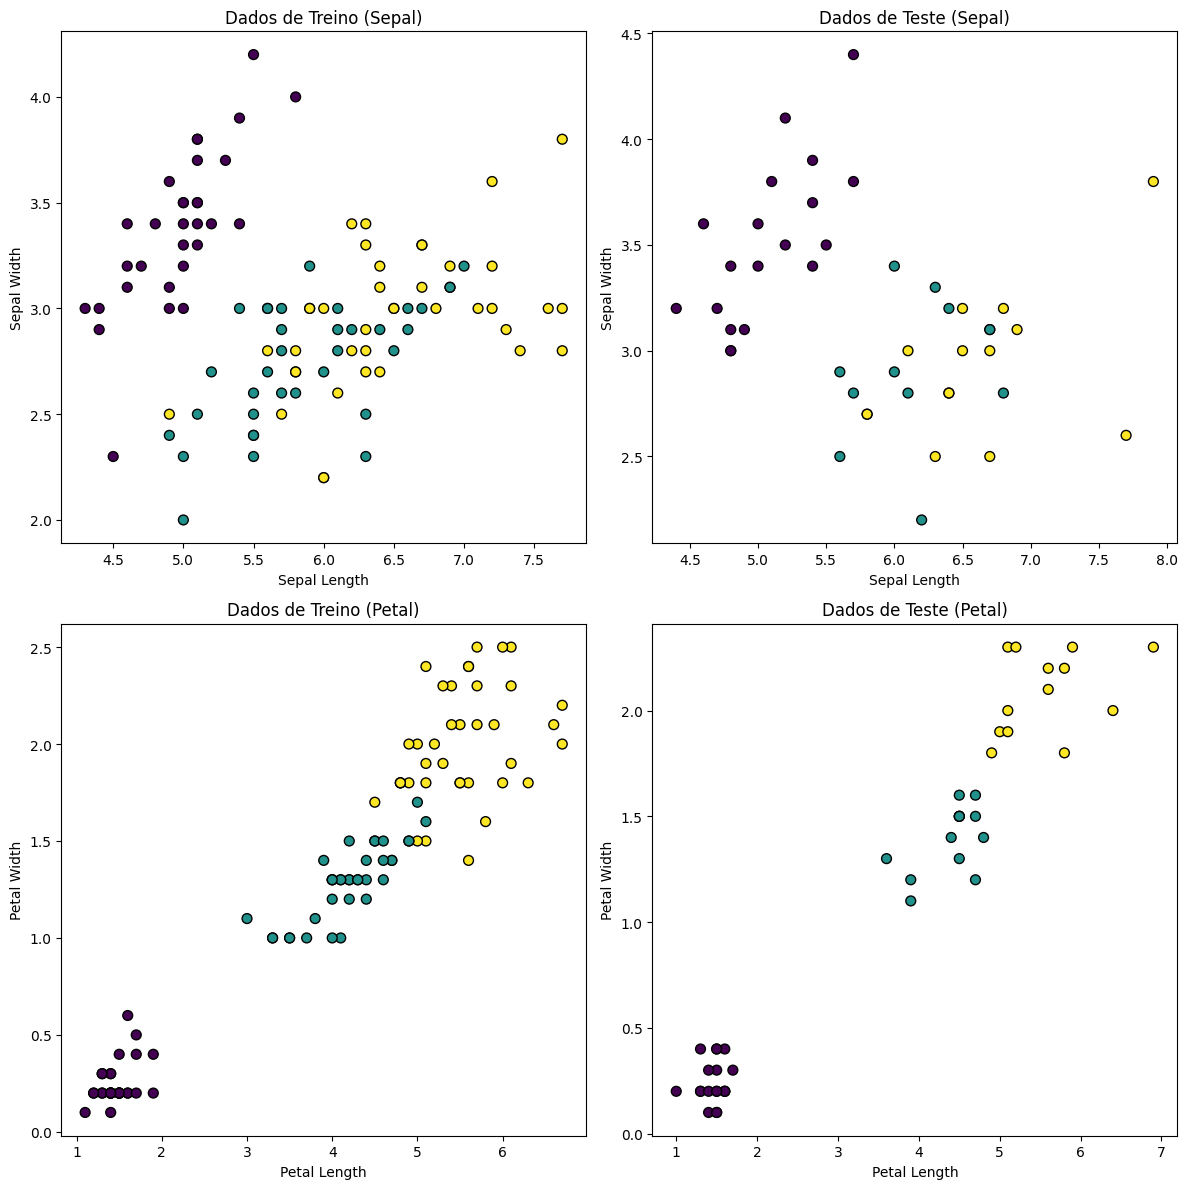

In [10]:
plot_scatter(X_train, X_test, y_train, y_test)

Função para modelar a gaussiana 2D para as caracteristicas petalLenght e petalWidth

In [11]:
X_petal_train = X_train[:, [2, 3]]
X_petal_test = X_test[:, [2, 3]]

def plot_gaussian_2d(X, subset_name):
    #media e matriz de covariância
    mean = np.mean(X, axis=0)
    cov = np.cov(X, rowvar=False)

    rv = multivariate_normal(mean, cov)

    #grade de valores para x e y
    x = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500)
    y = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    X_grid, Y_grid = np.meshgrid(x, y)
    pos = np.dstack((X_grid, Y_grid))

    Z = rv.pdf(pos)

    plt.figure(figsize=(8, 6))
    plt.contourf(X_grid, Y_grid, Z, cmap='viridis', alpha=0.7)
    plt.colorbar(label='Density')
    plt.title(f'Gaussiana 2D para dados de {subset_name}')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()

Gaussiana 2D para dados de treino

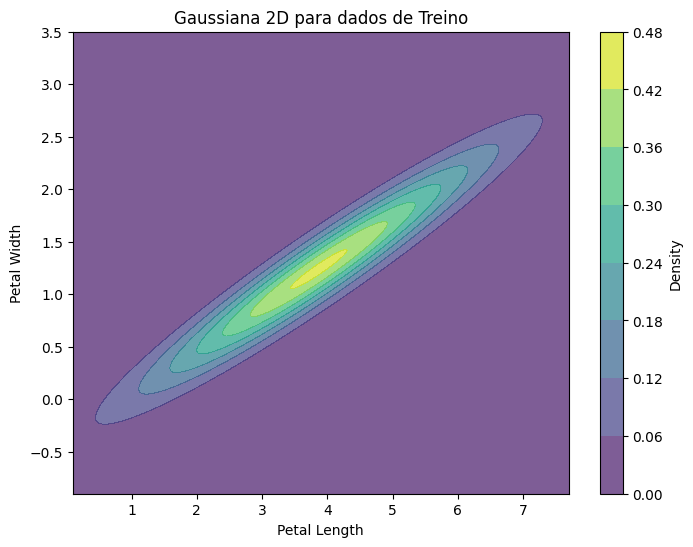

In [12]:
plot_gaussian_2d(X_petal_train, 'Treino')

Gaussiana 2D para dados de teste

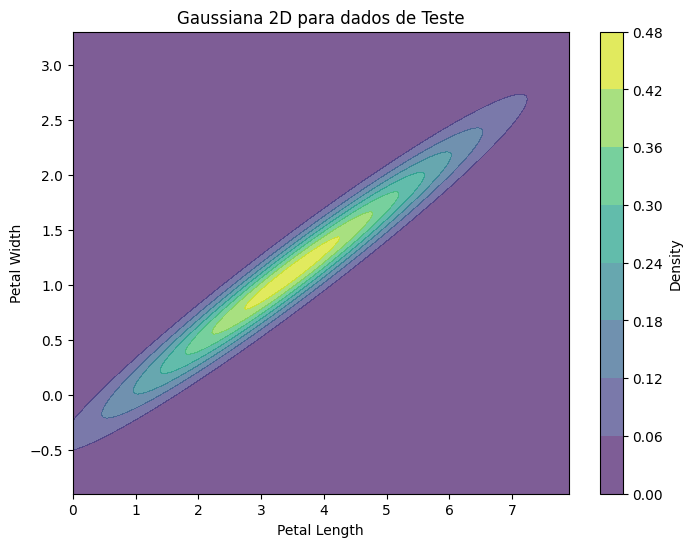

In [13]:
plot_gaussian_2d(X_petal_test, 'Teste')